<a href="https://colab.research.google.com/github/sanikanarmitwar/MusicGenreClassification/blob/main/musicgenreIMAGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python

In [2]:
!pip install librosa

In [3]:
import numpy as np
import pandas as pd
import os
from zipfile import ZipFile
import cv2  # Make sure OpenCV is installed via pip
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier
import librosa

In [4]:
# from google.colab import files
# uploaded = files.upload()

In [5]:
# extracts the data from zip file and stores in directory extract_path
def extract_zip(zip_path, extract_path):
    with ZipFile(zip_path, 'r') as zip_ref: #opens zip file in read mode
        zip_ref.extractall(extract_path)

def display_images(folder_path):
    exts = ['.png']

    for root, dirs, files in os.walk(folder_path):
        for file in files:
            directory_name = root.split('/')[-1]
            file_path = os.path.join(root, file)    #root stores current directory being traversed while file stores file name
            if any(file.lower().endswith(ext) for ext in exts):  # checking extension of file
                img = cv2.imread(file_path)
                # cv2_imshow(img)
# store zip file path in zipfile
file = "images_original.zip"
extfolder = "extracted_folder"

# extract the contents of the zip file
extract_zip(file, extfolder)

# display images in the extracted folder
display_images(extfolder)

(218, 336)


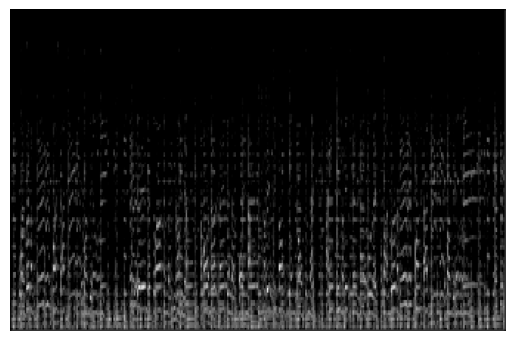

In [6]:
# extracting labels and cropping spectrogram images
y = []
exts = ['.png']
spectrogram = []

# Assuming extfolder is defined somewhere in your code
for root, dirs, files in os.walk(extfolder):
    for file in files:
        label = root.split('/')[-1]
        file_path = os.path.join(root, file)    # root stores current directory being traversed while file stores file name
        if any(file.lower().endswith(ext) for ext in exts):  # checking extension of file
            img = cv2.imread(file_path, 0)

            if img is None:
                print("Error loading image:", file_path)
                continue

            # Threshold the image to remove white borders and crop it
            _, binary = cv2.threshold(img, 254, 255, cv2.THRESH_BINARY_INV)
            kernel = np.ones((5,5), np.uint8)
            binary = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)
            contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            if contours:
                max_contour = max(contours, key=cv2.contourArea)
                x, k, w, h = cv2.boundingRect(max_contour)
                cropped_image = img[k:k+h, x:x+w]
            else:
                cropped_image = img

            # Add the cropped image to the spectrogram list
            spectrogram.append(cropped_image)

            # Append the label to the y list
            y.append(label)  # Convert label to string if necessary

# Display the shape of the 100th image in the spectrogram list
print(spectrogram[0].shape)

# Display the 100th image in the spectrogram list
plt.imshow(spectrogram[0], cmap='gray')
plt.axis('off')  # Turn off axis
plt.show()

In [7]:
linear_spectrogram = []
i=0
for image in spectrogram:
    i=i+1
    print(i)
    image = image.astype(float)
    linear = librosa.feature.inverse.mel_to_stft(image) #  Inverse Mel transform
    linear_spectrogram.append(linear)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [8]:
# spectral bandwidth
mean_spectral_bandwidth = []
var_spectral_bandwidth = []
for image in linear_spectrogram:
    spectral_bandwidths = librosa.feature.spectral_bandwidth(S=image)
    mean = np.mean(spectral_bandwidths)
    mean_spectral_bandwidth.append(mean)

    var = np.var(spectral_bandwidths)
    var_spectral_bandwidth.append(var)
    print(mean)

2315.5721033338036
1907.0946908562369
2517.6650126901673
1794.3360148062336
2303.600936408882
2128.3540272820355
2061.6757098259254
2041.0597252396892
2414.793346875211
2034.4866140627616
2116.463755378161
1348.7309477517872
2110.2333273682293
1773.903279655748
1596.6932921138887
1862.47370198625
1904.1531638930062
1857.2040620845385
1683.9831678144096
1914.7659595418288
1810.1157730952518
1827.0687335170576
1871.1989165722637
1897.319005896234
1698.2695181025747
1631.543860375076
1507.726617282815
2128.555252256961
1747.488989886929
1729.1333654992175
1791.6404419127482
1771.217260109494
1467.0099533919722
1668.4778813410019
1825.5046489582032
2065.6635630492956
1794.8447827398984
1726.6331550243722
1883.792354467483
1411.5628530856043
2603.912502774609
2659.1103732900774
2571.0089592492013
2586.2599115056573
2717.142914433142
1880.8750267380224
1902.4034308339417
2000.5072159378524
2671.342469591506
1564.3592770080536
2618.298224623508
2848.595897465753
1820.0546890880996
2796.725621

In [9]:
# spectral centroid
mean_spectral_centroid = []
var_spectral_centroid = []

for image in linear_spectrogram:
    spectral_centroid = librosa.feature.spectral_centroid(S=image)
    mean = np.mean(spectral_centroid)
    mean_spectral_centroid.append(mean)

    var = np.var(spectral_centroid)
    var_spectral_centroid.append(var)
    print(mean)

7597.829844240742
8234.761445014647
6909.8419084597235
8368.925912203558
6687.4359182848375
7240.152440251644
7556.340531036355
7606.734975739261
7364.647109896227
7735.914660847233
7355.358181710153
8941.09933074298
7893.507958981491
8354.310239893755
8856.190870060467
8334.555080876571
8237.153411550871
8374.360030668438
8647.31544713705
8100.271010432844
8323.152470333604
8395.531140065521
8365.590018013907
8103.009822844509
8520.975353042193
8685.064041663665
8814.34252251567
7868.576236176876
8312.323964160134
8302.247136882555
8113.060173286512
8086.4333983245815
8630.232951768496
8219.226450716964
8082.58916308398
7745.551712860212
7984.40877906476
8379.709594271257
7984.823264652019
8612.346052686169
7335.126076521607
7295.627421588192
7887.431013764364
7245.911781351768
7386.584363800924
8461.571463720742
8341.136346272977
8107.971523836175
7124.785556926723
8593.980529164852
7320.65805758068
6670.275109665895
8494.785640583676
6865.798959717435
6924.501235978836
7265.58704569

In [10]:
# spectral contrast
mean_spectral_contrast = []
var_spectral_contrast = []

for image in linear_spectrogram:
    spectral_contrast = librosa.feature.spectral_contrast(S=image)
    mean = np.mean(spectral_contrast)
    mean_spectral_contrast.append(mean)

    var = np.var(spectral_contrast)
    var_spectral_contrast.append(var)
    print(mean)

39.42578332768745
35.671219295211856
38.527218746691254
32.019076431753405
45.34043980339556
40.73246072437072
38.59477314580852
40.70377023931807
45.04526013072191
39.15100570997185
37.761338212777055
27.392009359227913
39.791743735588724
32.62977245498196
29.122150240099533
33.309976570234234
33.829798619417055
35.999862404969676
30.40010698002322
34.78676595352299
32.483164935363256
33.75121183165423
34.65415134156886
35.89500317845586
32.896691731546824
31.58013926389163
28.619935870522458
41.291887799000385
34.338535762805535
35.835578114969834
36.092318836124015
37.87882226143959
31.387533112644867
35.911429200341786
37.535346355208084
43.26721890235003
37.07482642773899
31.1687245330382
41.353550569472475
27.430752925536055
49.16278922733648
53.48156325154343
52.07521600670907
50.70796726809801
54.11685552978989
47.78216817579575
44.58689581562535
47.687898582329176
46.707718917696035
38.13233429009819
43.060315489539136
40.69900245984361
35.46229076390405
43.4125507697223
44.18

In [11]:
# spectral rolloff
mean_spectral_rolloff= []
var_spectral_rolloff= []

for image in linear_spectrogram:
    spectral_rolloff = librosa.feature.spectral_rolloff(S=image)
    mean = np.mean(spectral_rolloff)
    mean_spectral_rolloff.append(mean)

    var = np.var(spectral_rolloff)
    var_spectral_rolloff.append(var)

    print(mean)

10070.489501953125
10235.385131835938
9707.597351074219
10246.023559570312
9141.61376953125
9463.650512695312
9611.146545410156
9628.097534179688
9980.767822265625
9937.605285644531
9708.334350585938
10304.6630859375
10189.05029296875
10345.133972167969
10590.618896484375
10434.599304199219
10392.013549804688
10338.693237304688
10527.268981933594
10312.60986328125
10315.109252929688
10350.485229492188
10385.861206054688
10154.571533203125
10350.613403320312
10426.492309570312
10504.261779785156
10067.477416992188
10157.199096679688
9925.717163085938
9842.532348632812
9724.163818359375
9997.846984863281
9795.011901855469
9813.020324707031
9761.141967773438
9656.007385253906
10099.200439453125
9790.68603515625
9974.679565429688
9968.399047851562
10011.337280273438
10189.306640625
9960.195922851562
10063.984680175781
10143.516540527344
10157.487487792969
10075.135803222656
9929.402160644531
10100.289916992188
10051.487731933594
9856.951904296875
10297.261047363281
9948.08349609375
9935.10

In [12]:
# mfcc
mean_mfcc= []
var_mfcc= []

for image in spectrogram:
    mfcc = librosa.feature.mfcc(S=image, n_mfcc = 40)
    mean = np.mean(mfcc,axis=1)
    mean_mfcc.append(mean)

    var = np.var(mfcc,axis=1)
    var_mfcc.append(var)

    print(mean)

[ 264.60958418 -274.41226171  125.5314903   -74.76824075   63.46677922
  -30.48535124    9.1097689    -7.46010732    2.41892155    0.27822391
    6.55747832  -14.32886689   11.82434251   -0.77988869   -7.24064985
    6.64759718   -5.13809748    9.11706421  -11.59625603   10.92351507
  -10.95206103   15.41667442  -21.87971217   17.53577954   -5.60707571
    7.23839602  -19.28607185   15.70221628    2.48884832  -14.81678284
   10.95167383    1.25263065   -4.92755844   -0.94754306    6.41607481
  -11.0832347    11.03522351    3.14707405  -16.46406316    9.6589872 ]
[ 1.90002358e+02 -2.16284957e+02  1.36748479e+02 -9.21314593e+01
  6.95885503e+01 -5.02139288e+01  3.93318231e+01 -3.27531277e+01
  1.83142752e+01 -1.39400567e+01  1.29711056e+01 -8.85483043e+00
  5.47609968e+00 -1.79269774e+00 -1.10498722e+00  4.37441860e+00
 -2.41208111e+00  1.15788933e+00 -3.07402851e+00  7.96520227e+00
 -1.32507348e+01  1.32165021e+01 -1.21383765e+01  7.15185421e+00
 -5.94108996e-01 -1.15314960e+00 -1.46059

In [13]:
# chroma
mean_chroma= []
var_chroma= []

for image in linear_spectrogram:
    chroma = librosa.feature.chroma_stft(S=image)
    mean = np.mean(chroma)
    mean_chroma.append(mean)

    var = np.var(chroma)
    var_chroma.append(var)

    print(mean)

0.6568555602132294
0.5371957632583316
0.7419094589452873
0.5350577130254138
0.6185811050852651
0.6079259305679526
0.5202159050999915
0.566970884341026
0.6437539297696353
0.5537985104642311
0.5615676979706413
0.4183356301877655
0.5773272230966597
0.5455108689559965
0.3839967722360283
0.45995345980532043
0.4788871527447256
0.5479479075096332
0.42800507904134977
0.5481167499162485
0.5506581195816743
0.5055123802850405
0.4898912924317348
0.5695150064333483
0.5055938252862561
0.4917943485200061
0.3919899983321599
0.5552119438717835
0.5066566419191059
0.46266387059121156
0.5380641440890881
0.5106690047827075
0.403036017359245
0.5028013065218603
0.4875024040516844
0.5779688322916966
0.5139880151032424
0.40749142258196513
0.5085757684629474
0.404688932325665
0.6874937842514407
0.6968766656974806
0.5805688182079953
0.700766988770894
0.6602849099200425
0.5904048759152333
0.6041471097767025
0.6284785167402221
0.701791021588415
0.5297311549786254
0.6935099774976152
0.7359842925212805
0.47955200117

In [14]:
# root mean square
mean_rms = []
var_rms = []

for image in linear_spectrogram:
    waveform = librosa.griffinlim(image)
    hop_length = 512
    rms = librosa.feature.rms(y=waveform, hop_length=hop_length)

    mean = np.mean(rms)
    mean_rms.append(mean)

    var = np.var(rms)
    var_rms.append(var)
    print(mean)

0.69206506
0.61013615
0.86488295
0.58762586
0.61288005
0.53336877
0.49964342
0.6033925
0.80594826
0.49447015
0.53304183
0.44831032
0.6206276
0.5340829
0.40127218
0.43774962
0.51274806
0.5737258
0.42818016
0.54980695
0.5544089
0.5877959
0.5492602
0.6026568
0.5408642
0.4814389
0.35039917
0.58162725
0.5389893
0.53322875
0.60954994
0.60575134
0.4893014
0.59956694
0.5943597
0.667524
0.6099089
0.44152313
0.63587666
0.4368255
0.8620533
0.8306118
0.6957093
0.8398632
0.8071377
0.7134022
0.6945567
0.7115387
0.8501681
0.6634847
0.8025605
0.9355332
0.56098074
0.8098574
0.8741445
0.75162953
0.6410003
0.76916075
0.7475217
0.6928384
0.8826901
0.9235911
0.75862277
0.73006105
0.94469833
0.8461747
0.82491195
0.8845326
0.8244157
0.81770504
0.79046947
0.94234556
0.8893585
0.8192544
0.6990936
0.77503693
0.81600624
0.90933627
0.93439513
0.9404771
0.8018813
0.9347734
0.9138873
0.83092326
0.8594178
0.64569116
0.59329516
0.6474462
0.64930487
0.41254258
0.64168257
0.6969728
0.45368993
0.51994616
0.5376027
0.763

In [15]:
# zero crossing rate
mean_zcr = []
var_zcr = []

for image in linear_spectrogram:
    waveform = librosa.griffinlim(image)
    hop_length = 512
    zcr = librosa.feature.zero_crossing_rate(y=waveform, hop_length=hop_length)

    mean = np.mean(zcr)
    mean_zcr.append(mean)

    var = np.var(zcr)
    var_zcr.append(var)
    print(mean)

0.6884707496279762
0.7434735979352679
0.6356593540736607
0.7674226306733631
0.5994059244791666
0.6535659063430059
0.6920863560267857
0.6992332821800595
0.6858738490513393
0.6965884254092262
0.6549362909226191
0.8152436755952381
0.713592529296875
0.7519153413318452
0.7962283179873512
0.7430812290736607
0.7388421921502977
0.7586931501116071
0.7651221865699405
0.7250773111979166
0.7496701195126488
0.7627694266183036
0.7515520368303571
0.7316138857886905
0.7673470633370536
0.7825244721912202
0.7924514043898809
0.7025742303757441
0.7485598609561012
0.7539018903459821
0.7351568312872023
0.7281639462425595
0.7849208286830357
0.7432672409784227
0.7322329566592262
0.7046261742001488
0.7204851422991071
0.7440345400855655
0.7267310732886905
0.774627685546875
0.6877732049851191
0.6786513555617559
0.7233014787946429
0.6779407319568452
0.6875523158482143
0.77288818359375
0.7677423386346727
0.7337079729352679
0.6653224400111607
0.7733357747395834
0.68243408203125
0.6199951171875
0.7686651320684523
0.

In [16]:
X = pd.DataFrame()
X['mean_spectral_bandwidth'] = mean_spectral_bandwidth
X['var_spectral_bandwidth'] = var_spectral_bandwidth
X['mean_spectral_centroid'] = mean_spectral_centroid
X['var_spectral_centroid'] = var_spectral_centroid
X['mean_spectral_contrast'] = mean_spectral_contrast
X['var_spectral_contrast'] = var_spectral_contrast
X['mean_spectral_rolloff'] = mean_spectral_rolloff
X['var_spectral_rolloff'] = var_spectral_rolloff
X['mean_chroma'] = mean_chroma
X['var_chroma'] = var_chroma
X['mean_rms'] = mean_rms
X['var_rms'] = var_rms
X['mean_zcr'] = mean_zcr
X['var_zcr'] = var_zcr

mean_columns = [f'mfcc{i}_mean' for i in range(1, 41)]
df_mean = pd.DataFrame(mean_mfcc, columns=mean_columns)

# Create DataFrame for variance MFCCs
var_columns = [f'mfcc{i}_var' for i in range(1, 41)]
df_var = pd.DataFrame(var_mfcc, columns=var_columns)

# Concatenate mean and variance DataFrames along columns
df_combined = pd.concat([df_mean, df_var], axis=1)

# Add columns to existing DataFrame 'x'
X = pd.concat([X, df_combined], axis=1)
display(X)

,mean_spectral_bandwidth,var_spectral_bandwidth,mean_spectral_centroid,var_spectral_centroid,mean_spectral_contrast,var_spectral_contrast,mean_spectral_rolloff,var_spectral_rolloff,mean_chroma,var_chroma,...,mfcc31_var,mfcc32_var,mfcc33_var,mfcc34_var,mfcc35_var,mfcc36_var,mfcc37_var,mfcc38_var,mfcc39_var,mfcc40_var
0,2315.572103,130065.820068,7597.829844,490740.285385,39.425783,1440.131838,10070.489502,61332.549714,0.656856,0.059934,...,2439.869249,1876.383142,1379.568136,1514.993654,1717.254288,1604.786669,1247.898244,1231.896191,1238.732767,1142.502967
1,1907.094691,398894.244201,8234.761445,939496.541682,35.671219,1361.310911,10235.385132,130756.507879,0.537196,0.093072,...,1342.746113,924.519926,937.225718,1356.594531,1551.873485,1528.887324,1307.996095,1233.094547,1168.491413,1115.540173
2,2517.665013,71625.476385,6909.841908,315778.959303,38.527219,1373.023345,9707.597351,67479.562552,0.741909,0.037471,...,2003.400083,2172.252329,1834.459162,1958.783476,1985.018615,1371.696002,1353.163380,1246.544875,1183.533533,1223.911170
3,1794.336015,270994.166348,8368.925912,727919.856656,32.019076,1302.662078,10246.023560,73144.839546,0.535058,0.096010,...,524.329057,435.123248,272.864062,284.833702,350.056609,312.849663,337.727694,325.908880,232.825982,254.167890
4,2303.600936,93325.016929,6687.435918,532770.435864,45.340440,1453.692371,9141.613770,325785.541311,0.618581,0.063117,...,1614.181131,1458.709941,1205.263195,1519.990589,1164.916897,881.360227,931.655427,935.316831,862.508241,782.723417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,2740.227778,48010.899831,6803.998820,247306.174483,42.738026,1443.835731,9760.084534,31018.846517,0.754362,0.030161,...,2699.657345,2287.347369,1332.416274,1588.827270,3036.443190,2856.063288,2143.415453,1877.372499,2487.430096,1660.550428
995,2756.181317,51882.331425,6607.660105,223226.870401,42.793868,1439.632737,9685.391235,27099.677911,0.795808,0.019817,...,1887.443932,1726.581523,1603.505799,1281.534316,1325.033942,1060.179575,931.086212,1331.313127,858.450264,1374.198509
996,2869.797347,18227.564113,6299.208989,111009.555111,35.679502,1385.317919,9565.580750,26300.367282,0.824694,0.013929,...,2504.948925,2469.153348,1724.582291,1393.654861,2249.288828,1633.142758,1262.836141,1558.294616,1231.477280,1507.621567
997,2184.209556,346202.621405,7872.666705,671265.989770,41.075725,1407.069373,10121.182251,69475.593036,0.591227,0.073109,...,1567.009936,1246.557434,1428.171965,1387.449717,1650.624539,1463.333426,949.293189,1159.204064,1584.886239,1503.839985


In [17]:
#train test split
# X = np.array(X)
# y = np.array(y)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_categorical = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# X_train = X_train.reshape(-1, 1)
# X_test = X_test.reshape(-1, 1)
# y_train = y_train.reshape(-1, 1)
# y_test = y_test.reshape(-1, 1)
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (799, 94)
Shape of y_train: (799,)
Shape of X_test: (200, 94)
Shape of y_test: (200,)


In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays to DataFrames
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Display the DataFrames
print("X_train_scaled DataFrame:")
display(X_train_scaled_df)

print("\nX_test_scaled DataFrame:")
display(X_test_scaled_df)

X_train_scaled DataFrame:


,mean_spectral_bandwidth,var_spectral_bandwidth,mean_spectral_centroid,var_spectral_centroid,mean_spectral_contrast,var_spectral_contrast,mean_spectral_rolloff,var_spectral_rolloff,mean_chroma,var_chroma,...,mfcc31_var,mfcc32_var,mfcc33_var,mfcc34_var,mfcc35_var,mfcc36_var,mfcc37_var,mfcc38_var,mfcc39_var,mfcc40_var
0,0.395417,0.244015,0.615492,0.284813,0.422841,0.849738,0.668805,0.048598,0.409499,0.593649,...,0.123009,0.202805,0.169514,0.149716,0.115152,0.110877,0.124508,0.134372,0.053097,0.096729
1,0.620703,0.079235,0.398087,0.186942,0.494595,0.932472,0.616561,0.096511,0.643449,0.337371,...,0.181592,0.235160,0.252319,0.277518,0.186570,0.234367,0.259732,0.294804,0.367255,0.330323
2,0.323586,0.068582,0.488070,0.162590,0.288100,0.764339,0.389365,0.360428,0.213755,0.678132,...,0.096658,0.087177,0.132295,0.179883,0.121110,0.141474,0.171896,0.154664,0.069840,0.067323
3,0.455501,0.137488,0.541101,0.162886,0.406252,0.848009,0.693289,0.019408,0.643563,0.329395,...,0.193373,0.207698,0.243092,0.248058,0.244555,0.206789,0.167126,0.191164,0.158424,0.174879
4,0.396326,0.457259,0.831129,0.368138,0.486504,0.817990,0.886692,0.024513,0.161011,0.849220,...,0.034186,0.027922,0.045388,0.059038,0.043752,0.042862,0.050371,0.033201,0.024078,0.023976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,0.552959,0.049583,0.461987,0.152971,0.482955,0.974711,0.726807,0.103023,0.438754,0.432434,...,0.387960,0.310369,0.326206,0.423069,0.244503,0.168623,0.174572,0.245919,0.276905,0.395311
795,0.628296,0.055630,0.375894,0.137333,0.562704,0.935979,0.655550,0.038025,0.669882,0.273774,...,0.180026,0.299380,0.271493,0.327588,0.345120,0.261423,0.297697,0.284010,0.106746,0.159191
796,0.672468,0.128871,0.353128,0.256689,0.737278,0.707859,0.596892,0.142627,0.567671,0.369063,...,0.154069,0.297424,0.426210,0.388436,0.248568,0.287981,0.338066,0.281824,0.274521,0.349369
797,0.494750,0.285525,0.654633,0.487745,0.520874,0.702183,0.839247,0.062958,0.333618,0.689037,...,0.168409,0.251086,0.285701,0.277342,0.185113,0.163145,0.167375,0.142154,0.081456,0.081133



X_test_scaled DataFrame:


,mean_spectral_bandwidth,var_spectral_bandwidth,mean_spectral_centroid,var_spectral_centroid,mean_spectral_contrast,var_spectral_contrast,mean_spectral_rolloff,var_spectral_rolloff,mean_chroma,var_chroma,...,mfcc31_var,mfcc32_var,mfcc33_var,mfcc34_var,mfcc35_var,mfcc36_var,mfcc37_var,mfcc38_var,mfcc39_var,mfcc40_var
0,0.523848,0.216365,0.556125,0.378471,0.587187,0.722572,0.762185,0.061902,0.518833,0.529680,...,0.176774,0.334485,0.483386,0.383783,0.199815,0.212402,0.258841,0.203586,0.101816,0.080292
1,0.705182,0.040515,0.289660,0.099514,0.663669,0.795413,0.606003,0.124192,0.669417,0.270212,...,0.302563,0.263110,0.404704,0.292497,0.238871,0.284072,0.265941,0.330919,0.261994,0.204330
2,0.824891,0.002806,0.149312,0.013612,0.828256,0.415310,0.610193,0.018695,0.801507,0.110153,...,0.222587,0.257378,0.303649,0.472337,0.471191,0.264374,0.286470,0.410129,0.239686,0.183114
3,0.800799,0.037192,0.118461,0.126134,0.499719,0.878565,0.528559,0.032311,0.851612,0.133280,...,0.251877,0.269760,0.408235,0.391243,0.161966,0.207781,0.243260,0.235525,0.192443,0.198475
4,0.492881,0.102858,0.487677,0.141316,0.532201,0.910374,0.621772,0.075796,0.503040,0.391563,...,0.355190,0.365163,0.421961,0.478287,0.231074,0.212777,0.202324,0.275938,0.262360,0.330860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.769843,0.005368,0.151476,0.034733,0.469269,0.828160,0.551291,0.019856,0.864193,0.072670,...,0.179585,0.253610,0.280192,0.347143,0.203663,0.221042,0.229870,0.211325,0.243487,0.145655
196,0.281802,0.206703,0.727156,0.208644,0.350753,0.714689,0.656372,0.057820,0.185097,0.672025,...,0.370014,0.559038,0.509604,0.435708,0.304924,0.287490,0.297481,0.280440,0.201991,0.156007
197,0.674493,0.011890,0.204195,0.044154,0.457856,0.966135,0.527691,0.013123,0.824367,0.119869,...,0.262123,0.370401,0.316456,0.520864,0.562969,0.502324,0.250697,0.517532,0.613712,0.359765
198,0.508744,0.078261,0.495239,0.138166,0.500195,0.912266,0.685595,0.020437,0.678413,0.250966,...,0.297098,0.453127,0.208584,0.331571,0.313872,0.214731,0.233161,0.336503,0.209239,0.154717


In [19]:
n_components = 40   # Set the desired number of components
pca = PCA(n_components=n_components)

X_train_pca = pca.fit_transform(X_train_scaled_df)
X_test_pca = pca.transform(X_test_scaled_df)
     

In [20]:
!pip install seaborn


   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ----------------------- ---------------- 174.1/294.9 kB 5.3 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 4.4 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.3 MB/s eta 0:00:00


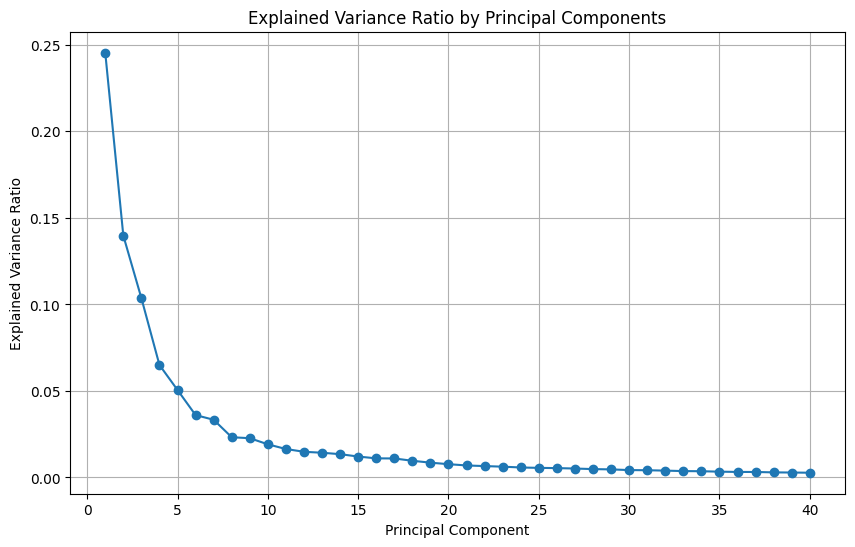

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Explained Variance Ratio for PCA
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_components+1), pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance Ratio by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_classifier = DecisionTreeClassifier(max_depth = 8)
dt_classifier.fit(X_train_pca, y_train)
dt_pred = dt_classifier.predict(X_test_pca)
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Classifier Accuracy:", dt_accuracy*100, "%")

Decision Tree Classifier Accuracy: 36.5 %


In [23]:
from sklearn.svm import SVC
svm_classifier = SVC()
svm_classifier.fit(X_train_pca, y_train)
svm_pred = svm_classifier.predict(X_test_pca)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Classifier Accuracy:", svm_accuracy*100, "%")

SVM Classifier Accuracy: 67.5 %


kNN Classifier Accuracy for k = 1 : 57.99999999999999 %
kNN Classifier Accuracy for k = 2 : 56.00000000000001 %
kNN Classifier Accuracy for k = 3 : 57.49999999999999 %
kNN Classifier Accuracy for k = 4 : 59.5 %
kNN Classifier Accuracy for k = 5 : 57.49999999999999 %
kNN Classifier Accuracy for k = 6 : 56.99999999999999 %
kNN Classifier Accuracy for k = 7 : 55.00000000000001 %
kNN Classifier Accuracy for k = 8 : 56.49999999999999 %
kNN Classifier Accuracy for k = 9 : 54.50000000000001 %
kNN Classifier Accuracy for k = 10 : 55.50000000000001 %
kNN Classifier Accuracy for k = 11 : 56.49999999999999 %
kNN Classifier Accuracy for k = 12 : 60.0 %
kNN Classifier Accuracy for k = 13 : 56.99999999999999 %
kNN Classifier Accuracy for k = 14 : 55.50000000000001 %
kNN Classifier Accuracy for k = 15 : 55.00000000000001 %
kNN Classifier Accuracy for k = 16 : 55.50000000000001 %
kNN Classifier Accuracy for k = 17 : 56.00000000000001 %
kNN Classifier Accuracy for k = 18 : 55.00000000000001 %
kNN Class

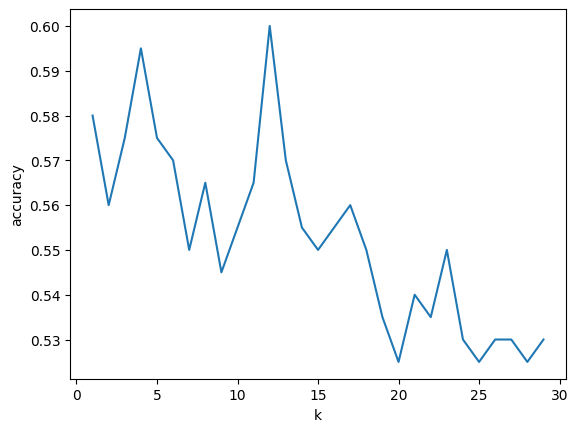

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn_acc = []
for k in np.arange(1,30,1):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train_pca, y_train)
    knn_pred = knn_classifier.predict(X_test_pca)
    knn_accuracy = accuracy_score(y_test, knn_pred)
    print("kNN Classifier Accuracy for k =",k, ":", knn_accuracy*100, "%")
    knn_acc.append(knn_accuracy)

xseq = np.linspace(1, 29, 29)
plt.plot(xseq, knn_acc)
plt.xlabel("k")
plt.ylabel("accuracy")
plt.show()

Random Forest Classifier Accuracy for n_estimators = 10 : 46.5 %
Random Forest Classifier Accuracy for n_estimators = 20 : 60.0 %
Random Forest Classifier Accuracy for n_estimators = 30 : 62.5 %
Random Forest Classifier Accuracy for n_estimators = 40 : 61.5 %
Random Forest Classifier Accuracy for n_estimators = 50 : 61.0 %
Random Forest Classifier Accuracy for n_estimators = 60 : 64.5 %
Random Forest Classifier Accuracy for n_estimators = 70 : 66.0 %
Random Forest Classifier Accuracy for n_estimators = 80 : 66.5 %
Random Forest Classifier Accuracy for n_estimators = 90 : 66.5 %
Random Forest Classifier Accuracy for n_estimators = 100 : 66.5 %
Random Forest Classifier Accuracy for n_estimators = 110 : 65.5 %


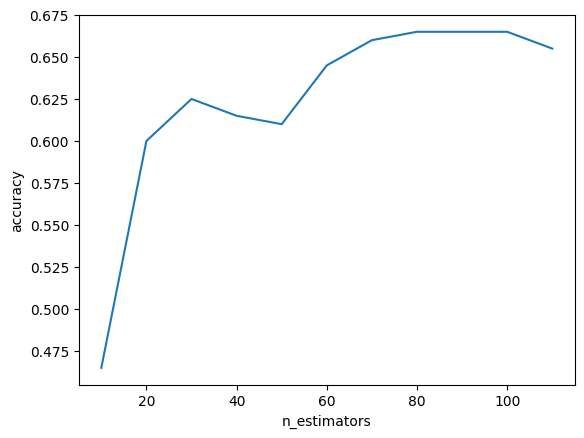

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_acc = []
for k in np.arange(10,120,10):

    rf_classifier = RandomForestClassifier(n_estimators=k, random_state=42)
    rf_classifier.fit(X_train_pca, y_train)

    y_pred = rf_classifier.predict(X_test_pca)

    accuracy = accuracy_score(y_test, y_pred)
    print("Random Forest Classifier Accuracy for n_estimators =",k, ":", accuracy*100, "%")
    rf_acc.append(accuracy)

xseq = np.linspace(10, 110, 11)
plt.plot(xseq, rf_acc)
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.show()

In [27]:
from sklearn.svm import SVC
svm_classifier = SVC()
svm_classifier.fit(X_train_pca, y_train)
svm_pred = svm_classifier.predict(X_train_pca)
svm_accuracy = accuracy_score(y_train, svm_pred)
print("SVM Classifier Accuracy:", svm_accuracy*100, "%")

SVM Classifier Accuracy: 83.35419274092615 %


kNN Classifier Accuracy for k = 1 : 100.0 %
kNN Classifier Accuracy for k = 2 : 77.59699624530664 %
kNN Classifier Accuracy for k = 3 : 76.84605757196495 %
kNN Classifier Accuracy for k = 4 : 74.34292866082603 %
kNN Classifier Accuracy for k = 5 : 71.21401752190238 %
kNN Classifier Accuracy for k = 6 : 69.58698372966208 %
kNN Classifier Accuracy for k = 7 : 69.58698372966208 %
kNN Classifier Accuracy for k = 8 : 66.70838548185232 %
kNN Classifier Accuracy for k = 9 : 65.70713391739675 %
kNN Classifier Accuracy for k = 10 : 65.20650813516896 %
kNN Classifier Accuracy for k = 11 : 64.58072590738423 %
kNN Classifier Accuracy for k = 12 : 64.70588235294117 %
kNN Classifier Accuracy for k = 13 : 64.08010012515645 %
kNN Classifier Accuracy for k = 14 : 63.20400500625782 %
kNN Classifier Accuracy for k = 15 : 63.32916145181476 %
kNN Classifier Accuracy for k = 16 : 63.07884856070088 %
kNN Classifier Accuracy for k = 17 : 62.95369211514393 %
kNN Classifier Accuracy for k = 18 : 63.329161451814

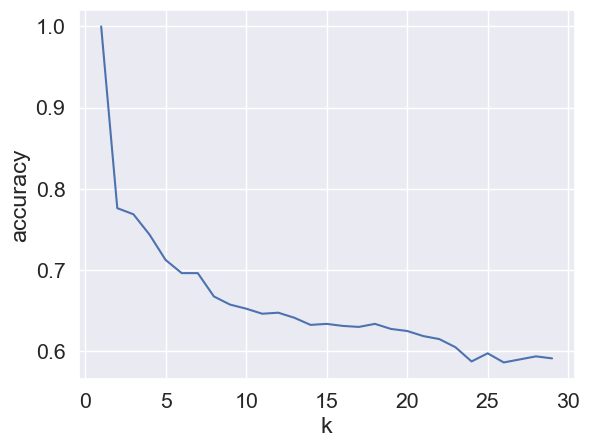

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn_acc = []
for k in np.arange(1,30,1):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train_pca, y_train)
    knn_pred = knn_classifier.predict(X_train_pca)
    knn_accuracy = accuracy_score(y_train, knn_pred)
    print("kNN Classifier Accuracy for k =",k, ":", knn_accuracy*100, "%")
    knn_acc.append(knn_accuracy)

xseq = np.linspace(1, 29, 29)
plt.plot(xseq, knn_acc)
plt.xlabel("k")
plt.ylabel("accuracy")
plt.show()

Random Forest Classifier Accuracy for n_estimators = 10 : 99.62453066332915 %
Random Forest Classifier Accuracy for n_estimators = 20 : 100.0 %
Random Forest Classifier Accuracy for n_estimators = 30 : 100.0 %
Random Forest Classifier Accuracy for n_estimators = 40 : 100.0 %
Random Forest Classifier Accuracy for n_estimators = 50 : 100.0 %
Random Forest Classifier Accuracy for n_estimators = 60 : 100.0 %
Random Forest Classifier Accuracy for n_estimators = 70 : 100.0 %
Random Forest Classifier Accuracy for n_estimators = 80 : 100.0 %
Random Forest Classifier Accuracy for n_estimators = 90 : 100.0 %
Random Forest Classifier Accuracy for n_estimators = 100 : 100.0 %
Random Forest Classifier Accuracy for n_estimators = 110 : 100.0 %


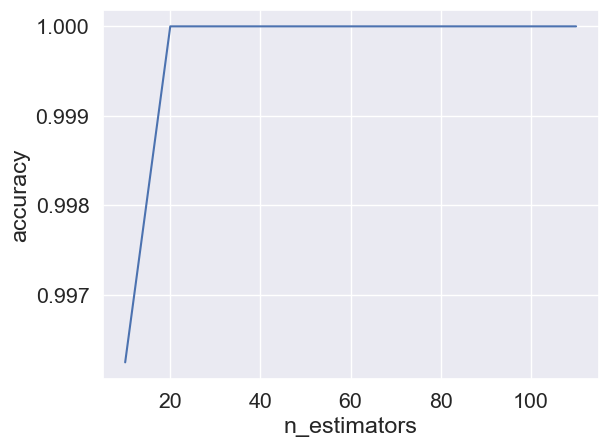

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_acc = []
for k in np.arange(10,120,10):

    rf_classifier = RandomForestClassifier(n_estimators=k, random_state=42)
    rf_classifier.fit(X_train_pca, y_train)

    y_pred = rf_classifier.predict(X_train_pca)

    accuracy = accuracy_score(y_train, y_pred)
    print("Random Forest Classifier Accuracy for n_estimators =",k, ":", accuracy*100, "%")
    rf_acc.append(accuracy)

xseq = np.linspace(10, 110, 11)
plt.plot(xseq, rf_acc)
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.show()

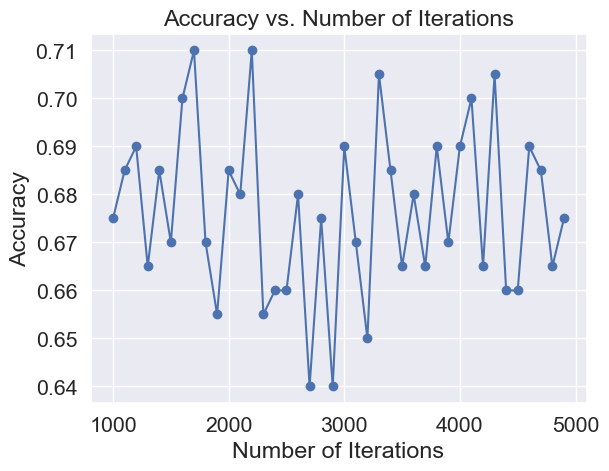

In [40]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

accuracies = []
iterations = range(1000, 5000, 100)  # Starting from 1000 iterations and increasing by steps of 100

# Iterate over different numbers of iterations
for max_iter in iterations:
    # Initialize and train the MLPClassifier
    clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=max_iter)
    clf.fit(X_train_pca, y_train)
    
    # Make predictions on the test data
    y_pred = clf.predict(X_test_pca)
    
    # Calculate accuracy and append to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot the accuracy vs. number of iterations
plt.plot(iterations, accuracies, marker='o')
plt.title('Accuracy vs. Number of Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


In [48]:
clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1700)

# Train the classifier on the training data
clf.fit(X_train_pca, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test_pca)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.705


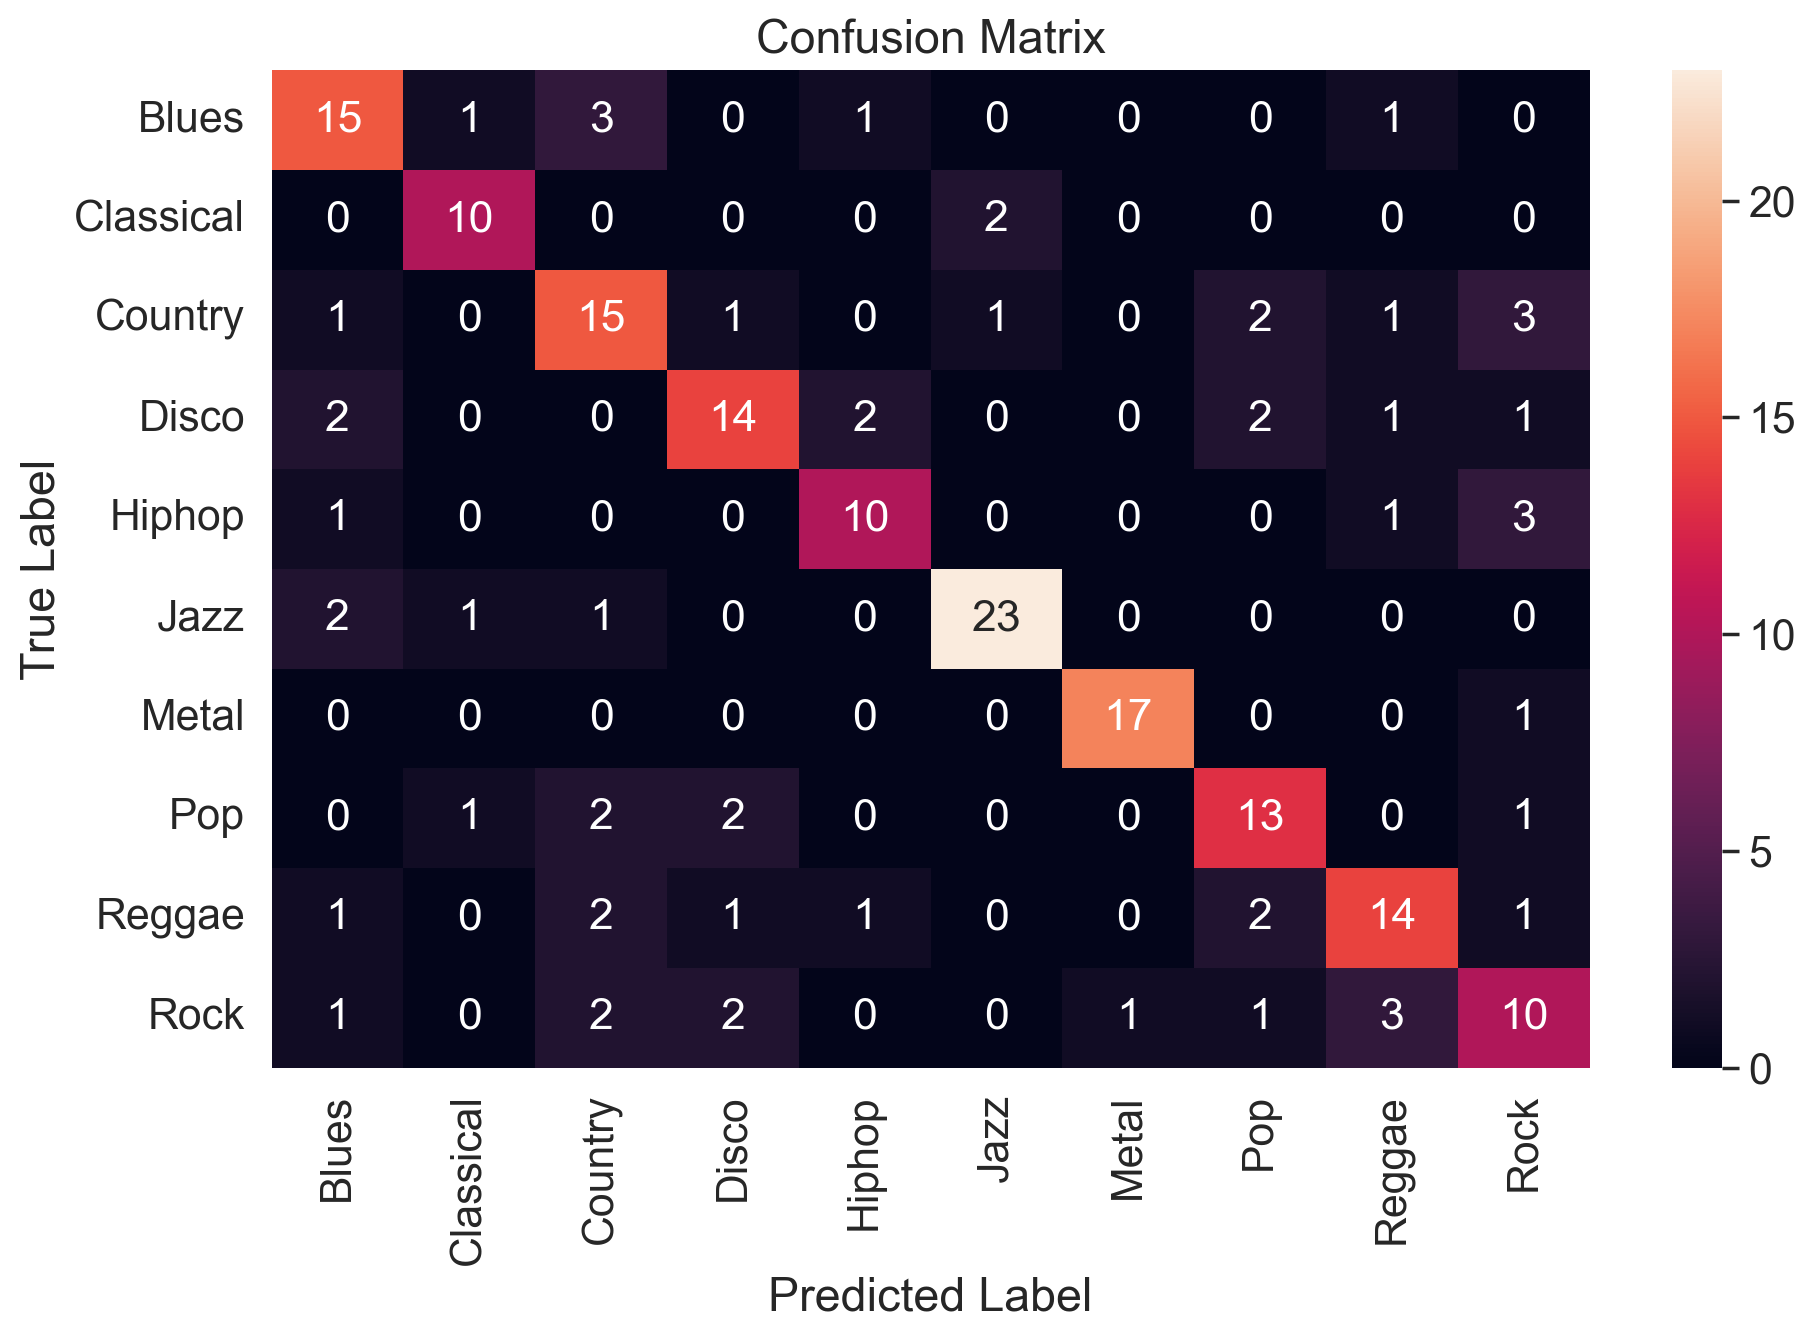

In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

class_names = ["Blues", "Classical", "Country", "Disco", "Hiphop", "Jazz", "Metal", "Pop", "Reggae", "Rock"]
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat = np.round(conf_mat, 2)

conf_mat_df = pd.DataFrame(conf_mat, columns=class_names, index=class_names)

plt.figure(figsize=(10, 7), dpi=200)
sns.set(font_scale=1.4)
sns.heatmap(conf_mat_df, annot=True, annot_kws={"size": 16})  # font size
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [50]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.71      0.68        21
           1       0.77      0.83      0.80        12
           2       0.60      0.62      0.61        24
           3       0.70      0.64      0.67        22
           4       0.71      0.67      0.69        15
           5       0.88      0.85      0.87        27
           6       0.94      0.94      0.94        18
           7       0.65      0.68      0.67        19
           8       0.67      0.64      0.65        22
           9       0.50      0.50      0.50        20

    accuracy                           0.70       200
   macro avg       0.71      0.71      0.71       200
weighted avg       0.71      0.70      0.71       200

